# Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
from numpy import array
from numpy import reshape
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from scipy.ndimage.filters import gaussian_filter
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
%matplotlib inline

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [4]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='/Users/debalinamaiti/Documents/GraduateStudy/MIDS/W207/Projects/1')
X, Y = mnist.data, mnist.target


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]
print ('data shape: ', X.shape)
print ('label shape:', Y.shape)
# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

('data shape: ', (70000, 784))
('label shape:', (70000,))


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

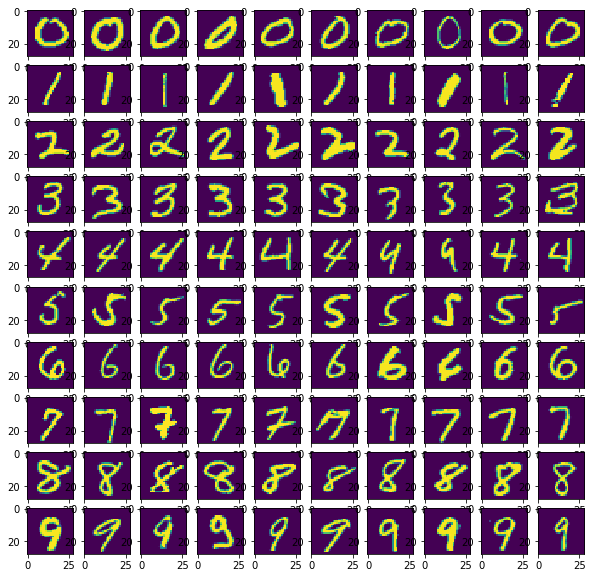

In [5]:
#P1:

#Define function to create a 10x10 grid to visualize 10 examples of each digit
def Visualize_Image(count, X, Y):
    plt.figure(figsize=(10, 10))
    for n in range(count):
        build_grid = X[(np.where(Y == n))][:count]
        for i in range(np.shape(build_grid)[0]):
            plt.subplot(10, count, (count*n)+i+1)
            y = build_grid[i].reshape([28, 28])
            plt.imshow(y)

#Call the function to visualize
Visualize_Image(10, mini_train_data, mini_train_labels)


(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [6]:
#P2:

## Define Function to evaluate dev data after fitting training data ##
def prediction(k, train_data, train_label, dev_data):
    neigh = KNeighborsClassifier(k)
    neigh.fit(train_data, train_label)
    predict = neigh.predict(dev_data)
    return predict

## Define Function to calculate accuracy ##
def accuracy(predict, dev_labels):
    accurate, total = 0, 0
    for pred, label in zip(predict, dev_labels):
        if pred == label: accurate += 1
        total += 1
    return [total, accurate, round(1.0*accurate/total, 4)]

## Call Predict and Accuracy Function to generate Classification Report ##
k_val = [1, 3, 5, 7, 9]
for k in k_val:
    predict = prediction(k, mini_train_data, mini_train_labels, dev_data)
    result = accuracy(predict, dev_labels)
    #print('For k = %d, total: %d  accurate: %d  accuracy: %f' %(k, result[0], result[1], result[2]))
    
    if k == 1:
        print('Here is the Classification Report when K = 1:')
        print(classification_report(predict, dev_labels, target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))
 

Here is the Classification Report when K = 1:
             precision    recall  f1-score   support

          0       0.98      0.91      0.94       107
          1       1.00      0.89      0.94       118
          2       0.79      0.99      0.88        82
          3       0.87      0.77      0.82        97
          4       0.82      0.89      0.85        96
          5       0.84      0.93      0.88        82
          6       0.96      0.94      0.95       100
          7       0.92      0.89      0.90       117
          8       0.88      0.94      0.91        89
          9       0.82      0.78      0.80       112

avg / total       0.89      0.89      0.89      1000



**ANSWER:** As per the Classification Report, digit 9 is the most difficult one

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
#P3
def time_n_accuracy(training_size):

### STUDENT START ###
    
    accuracies = []
    for t in training_size:      
        time_needed = []
        start_time = time.time()
        trainingX, trainingY = train_data[:t], train_labels[:t]
        predict = prediction(1, trainingX, trainingY, dev_data)
        result = accuracy(predict, dev_labels)
        accuracies.append(result[2])
        time_needed.append(time.time() - start_time)
        print('For training data size: %d, accuracy is: %s  and time needed is: %s'%(t, result[2], time_needed))
    return accuracies

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = time_n_accuracy(train_sizes)


For training data size: 100, accuracy is: 0.72  and time needed is: [0.10263204574584961]
For training data size: 200, accuracy is: 0.786  and time needed is: [0.20960593223571777]
For training data size: 400, accuracy is: 0.841  and time needed is: [0.46643996238708496]
For training data size: 800, accuracy is: 0.884  and time needed is: [0.9237959384918213]
For training data size: 1600, accuracy is: 0.902  and time needed is: [1.8266091346740723]
For training data size: 3200, accuracy is: 0.926  and time needed is: [3.6611337661743164]
For training data size: 6400, accuracy is: 0.937  and time needed is: [7.519986152648926]
For training data size: 12800, accuracy is: 0.959  and time needed is: [15.63839316368103]
For training data size: 25000, accuracy is: 0.97  and time needed is: [33.897096157073975]


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

estimated intercept =  0.8431559772258371
number of coefficient =  1
Predicted accuracy for 60000 train size is [1.24307226]


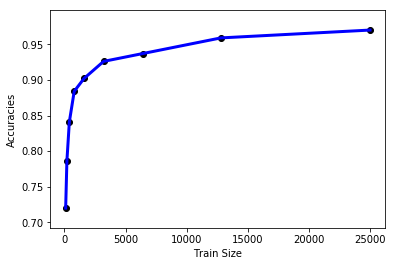

R^2 value is:  0.4430612960364496


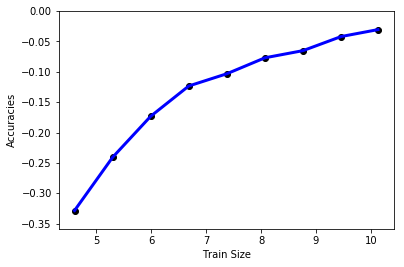

R^2 value is:  0.8889808367695207


In [6]:
#P4

lm = LinearRegression()

# transform data into array and then convert 1-d array to 2-d
train_size = array(train_sizes)
train_size = train_size.reshape((train_size.shape[0], 1))

lm.fit(train_size, accuracies)
print("estimated intercept = ", lm.intercept_)
print("number of coefficient = ", len(lm.coef_))

lin_pred = lm.predict(train_size)
lin_score = lm.score(train_size, accuracies)
print("Predicted accuracy for 60000 train size is", lm.predict(60000))

# Plot outputs
plt.xlabel('Train Size')
plt.ylabel('Accuracies')
plt.scatter(train_size, accuracies,  color='black')
plt.plot(train_size, accuracies, color='blue', linewidth=3)
plt.show()

print('R^2 value is: ',lin_score)

#Let's try run regression after taking log transformation of both train size and accuracies
log_accuracy = np.log(accuracies)
log_size = np.log(train_size)
lm_log = LinearRegression()
lm_log.fit(log_size, log_accuracy)
plt.xlabel('Train Size')
plt.ylabel('Accuracies')
plt.scatter(log_size, log_accuracy,  color='black')
plt.plot(log_size, log_accuracy, color='blue', linewidth=3)
plt.show()

print('R^2 value is: ',lm_log.score(log_size, log_accuracy))


ANSWER: As the variation of accuracies in respective to train size is very less, linear regression model could not fit it well. That is why a logarithmic transformation is used, which is giving pretty good R^2 measure for the new transformed model.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

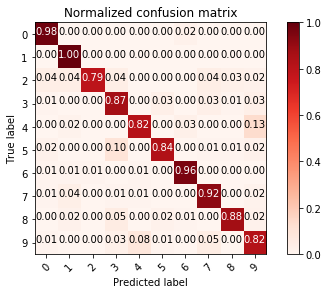

In [7]:
#P5()

#Build Confusion Matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    We are using normalization here.
    """
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

predictions = prediction(1, mini_train_data, mini_train_labels, dev_data)
cnf_matrix = confusion_matrix(dev_labels, predictions)
np.set_printoptions(precision=2)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


**Answer** - From the normalized confusion matrix '2' seems to be the most confused digit.  Let's try to plot few examples.

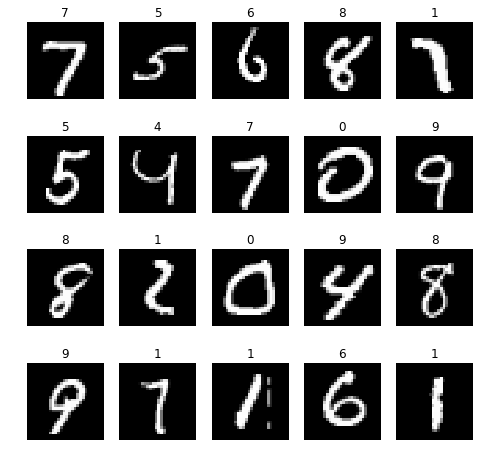

In [8]:
#P5 - Examples of wrong predictions

def plot_image(images, labels):
    n_cols = min(5, len(images))
    n_rows = len(images)//n_cols
    fig = plt.figure(figsize=(8,8))
    
    for i in range(n_rows * n_cols):
        sp = fig.add_subplot(n_rows, n_cols, i+1)
        plt.axis("off")
        plt.imshow(images[i], cmap = plt.cm.gray)
        sp.set_title(labels[i])
    plt.show()
sample = np.random.permutation(len(dev_data))
sample = sample[:20]
#knn = KNeighborsClassifier(1)
#knn.fit(mini_train_data, mini_train_labels)
#sample_pred = knn.predict(sample)
sample_pred = prediction(1, mini_train_data, mini_train_labels, dev_data[sample])
int_pred = sample_pred.astype("int32")
#plot_image(mini_train_data[dev_data].reshape(-1, 28, 28), int_pred[dev_data])
plot_image(dev_data[sample].reshape(-1, 28, 28), int_pred)

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Accuracy when mini_train_data is processed using blur function and dev data is at it is: 0.908


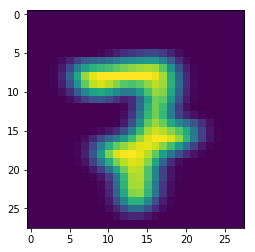

Accuracy when mini_train_data is as it is and dev_data is processed using blur function 0.871


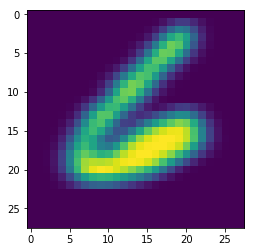

Accuracy when both mini_train_data and dev_data are processed using blur function 0.902


In [9]:
#P6
def gaus_blur(data_to_preprocess):
    res=[np.reshape(data, (28,28)) for data in data_to_preprocess]
    processed_data = []
    for digit in range(len(res)):
        gblur = [[0 for x in range(28)] for y in range(28)]
        for col in range(28):
            for row in range(28):
                if col==0 and row==0:
                    gblur[row][col]=(res[digit][row][col]+res[digit][row+1][col+1]
                                   +res[digit][row+1][col]+res[digit][row][col+1])/4
                elif col==0 and row==27:
                    gblur[row][col]=(res[digit][row][col]+res[digit][row-1][col+1]
                                   +res[digit][row-1][col]+res[digit][row][col+1])/4
                elif col==27 and row==0:
                    gblur[row][col]=(res[digit][row][col]+res[digit][row+1][col-1]
                                   +res[digit][row+1][col]+res[digit][row][col-1])/4
                elif col==27 and row==27:
                    gblur[row][col]=(res[digit][row][col]+res[digit][row-1][col-1]
                                   +res[digit][row-1][col]+res[digit][row][col-1])/4
                elif col==0 and (row != 0 or row != 27):
                    gblur[row][col]=(res[digit][row][col]+res[digit][row+1][col+1]
                                   +res[digit][row-1][col+1]+res[digit][row+1][col]
                                   +res[digit][row-1][col]+res[digit][row][col+1])/6
                elif row==0 and (col != 0 or col != 27):
                    gblur[row][col]=(res[digit][row][col]+res[digit][row+1][col+1]
                                   +res[digit][row+1][col-1]+res[digit][row+1][col]
                                   +res[digit][row][col+1]+res[digit][row][col-1])/6
                elif col==27 and (row != 0 or row != 27):
                    gblur[row][col]=(res[digit][row][col]+res[digit][row-1][col-1]
                                   +res[digit][row+1][col-1]+res[digit][row+1][col]
                                   +res[digit][row-1][col]+res[digit][row][col-1])/6
                elif row==27 and (col != 0 or col != 27):
                    gblur[row][col]=(res[digit][row][col]+res[digit][row-1][col-1]
                                   +res[digit][row-1][col+1]+res[digit][row-1][col]
                                   +res[digit][row][col+1]+res[digit][row][col-1])/6
                else:
                    gblur[row][col]=(res[digit][row][col]+res[digit][row+1][col+1]+res[digit][row-1][col-1]
                                   +res[digit][row+1][col-1]+res[digit][row-1][col+1]+res[digit][row+1][col]
                                   +res[digit][row-1][col]+res[digit][row][col+1]+res[digit][row][col-1])/9
        processed_data.append(gblur)
    return(processed_data)

#Calculate accuracy for processed train data and raw dev data
processed_train_data = gaus_blur(mini_train_data)
processed_train_data = np.reshape(processed_train_data,(len(mini_train_labels),-1))
processed_train_pred = prediction(1,processed_train_data, mini_train_labels, dev_data)
processed_train_accuracy = accuracy(processed_train_pred, dev_labels)
print('Accuracy when mini_train_data is processed using blur function and dev data is at it is:',processed_train_accuracy[2])
blur_train = gaussian_filter(processed_train_data[10],1)
plt.imshow(blur_train.reshape(28,28))
plt.show()

#Calculate accuracy for processed dev data and raw train data
processed_dev_data = gaus_blur(dev_data)
processed_dev_data = np.reshape(processed_dev_data,(len(dev_labels),-1))
processed_dev_pred = prediction(1,mini_train_data, mini_train_labels, processed_dev_data)
processed_dev_accuracy = accuracy(processed_dev_pred, dev_labels)
print('Accuracy when mini_train_data is as it is and dev_data is processed using blur function',processed_dev_accuracy[2])
blur_dev = gaussian_filter(processed_dev_data[10],1)
plt.imshow(blur_dev.reshape(28,28))
plt.show()

#Calculate accuracy for processed train data and processed dev data
processed_pred = prediction(1,processed_train_data, mini_train_labels, processed_dev_data)
processed_accuracy = accuracy(processed_pred, dev_labels)
print('Accuracy when both mini_train_data and dev_data are processed using blur function',processed_accuracy[2])

**ANSWER:** Accuracy for processed training set is the best.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [10]:
#P7

#Accuracy using BernoulliNB classifier on Binary data

BNB = BernoulliNB(binarize = 0)
BNB.fit(mini_train_data, mini_train_labels)
BNBpred = BNB.predict(dev_data)
BNBaccuracy = accuracy(BNBpred, dev_labels)
print("Accuracy using binarize value is: ",BNBaccuracy[2])

#map the pixel values to 0, 1, or 2, representing white, grey, or black
mdev = dev_data.copy()
mdev[(mdev<=.33)]=0
mdev[np.all([(mdev > 0.33), (mdev <= 0.66)], axis=0)] = 1
mdev[(mdev>.66)]=2

mtrain = mini_train_data.copy()
mtrain[(mtrain<=.33)]=0
mtrain[np.all([(mtrain > 0.33), (mtrain <= 0.66)], axis=0)] = 1
mtrain[(mtrain>.66)]=2

#Accuracy using MultinomialNB classifier
MNB = MultinomialNB()
MNB.fit(mtrain, mini_train_labels)
MNBpred = MNB.predict(mdev)
MNBaccuracy = accuracy(MNBpred, dev_labels)
print("Accuracy when pixel values are mapped to 0, 1, 2: ",MNBaccuracy[2])

Accuracy using binarize value is:  0.815
Accuracy when pixel values are mapped to 0, 1, 2:  0.802


**ANSWER:** Multiclass version did not improve teh accuracy. Accuracy using binarize value is higher than that using multinomialNB. The reason is our data set is kind of two spiked distribution, for zero and one. Therefore binarize value got more accuracy.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [11]:
#P8:

# prepare a range of alpha values to test
alphas = np.array([0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0])
# create and fit a ridge regression model, testing each alpha
model = BernoulliNB()
model.fit(mini_train_data, mini_train_labels)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(mini_train_data, mini_train_labels)

# summarize the results of the grid search
print('best alpha value = ', grid.best_estimator_.alpha)
print('best score = ', grid.best_score_)

#Check accuracy when alpha = 0
mod0 = BernoulliNB(alpha = 0)
mod0.fit(mini_train_data, mini_train_labels)
mod0_pred = mod0.predict(dev_data)
mod0_result = accuracy(mod0_pred, dev_labels)
print('For alpha = 0,  accuracy=', mod0_result[2])

/Users/debalinamaiti/Documents/GraduateStudy/MIDS/Python_Bridge/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/debalinamaiti/Documents/GraduateStudy/MIDS/Python_Bridge/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/debalinamaiti/Documents/GraduateStudy/MIDS/Python_Bridge/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


best alpha value =  0.1
best score =  0.821
For alpha = 0,  accuracy= 0.797


/Users/debalinamaiti/Documents/GraduateStudy/MIDS/Python_Bridge/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [12]:
#print nb.best_params_
print('best parameter = ', grid.best_params_)

best parameter =  {'alpha': 0.1}


**ANSWER:**  Best Alpha value is 0.1.  
For $alpha = 0.1$ accuracy is 0.821  
For $alpha = 0$ accuracy is 0.0.797  

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [13]:
#P9:

#gnb_dev_data, gnb_dev_loads = np.array(dev_data), np.array(dev_loads)
GNB = GaussianNB()
GNB.fit(mini_train_data, mini_train_labels)
GNBpred = GNB.predict(dev_data)
GNBaccuracy = accuracy(GNBpred, dev_labels)
print("Accuracy using GaussianNB is: ",GNBaccuracy[2])

GNB.theta_ = array([[1]])
GNB.sigma_ = array([[2]])


Accuracy using GaussianNB is:  0.621


**ANSWER:** Accuracy is comparatively less because the used data set does not really fit with a standard normalized gaussian distribution. Therefore, if theta and sigma value can be tuned using this command: GNB.theta_ = theta and
GNB.sigma_ = sigma the accuracy can be increased.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

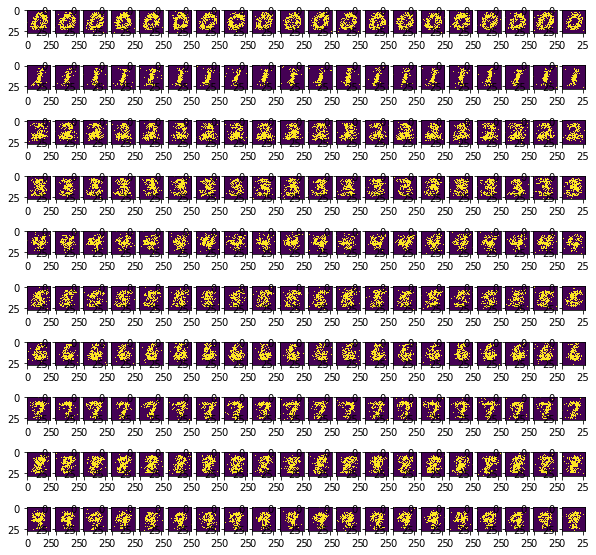

In [14]:
#P10
  
plt.figure(figsize=(10, 10))

for i in range(10):
    for j in range(20):
        matrix = np.exp(model.feature_log_prob_[i])
        for k, pixel in enumerate(matrix):
            r = np.random.rand()
            if pixel > r:
                matrix[k] = 1
            else:
                matrix[k] = 0
                
        ax = plt.subplot(10, 20, i*20+j+1)
        p = plt.imshow(matrix.reshape([28, 28]))

ANSWER: The generated digits are very much dotted and so not so distinct.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [15]:
#P11

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
def Calibration(X, Y, buckets,bnb_cal_acc = 0,max_buck = 0):
    #bnb_cal_acc = 0
    for n in buckets:        
        bnb_cal = BernoulliNB(alpha = n)
        bnb_cal.fit(X, Y)
        bnb_cal_pred = bnb_cal.predict(X)
        if (accuracy(bnb_cal_pred, Y))[2]> bnb_cal_acc:
            bnb_cal_acc = (accuracy(bnb_cal_pred, Y))[2]
            best_buck = n
        #print('For bucket = %f, accuracy = %f' %(n, (accuracy(bnb_cal_pred, Y))[2]))
    return best_buck

best_buck = Calibration(mini_train_data, mini_train_labels, buckets)
print('best bucket = ',best_buck)
best_bnb = BernoulliNB(alpha = best_buck)
best_bnb.fit(mini_train_data, mini_train_labels)
best_bnb_pred = best_bnb.predict(dev_data)
best_buck_result = accuracy(best_bnb_pred, dev_labels)
print('For bucket = %3f, total: %d  accurate: %d  accuracy: %f' %(best_buck, best_buck_result[0], best_buck_result[1], best_buck_result[2]))

best bucket =  0.5
For bucket = 0.500000, total: 1000  accurate: 813  accuracy: 0.813000


**ANSWER:** Amongst the provided bucket list, maximum posterior belongs to bucket 0.5.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [16]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()